# 1. 주요변수 - 인구수

### 1)주거인구 csv파일 로드 및 사전작업

In [1]:
!pip install pandas
import pandas as pd
pd.set_option('mode.chained_assignment' , None)
import numpy as np

In [2]:
## cvs파일업로드

data = pd.read_csv('서울특별시 구별 주거인구.csv', index_col=0, encoding='CP949', engine='python')

data.head() #작업내용 확인용 출력

,주거인구,면적
행정구역,,
종로구,64,2400
중구,125,1000
용산구,106,2200
성동구,182,1700
광진구,198,1700


In [3]:
data[['주거인구']] = data[['주거인구']].astype(int)
data[['면적']] = data['면적'].astype(int)

data['면적 * 주거인구수']=0
data[['면적 * 주거인구수']]= data[['면적 * 주거인구수']].astype(int)
data.head() #작업내용 확인용 출력

,주거인구,면적,면적 * 주거인구수
행정구역,,,
종로구,64,2400,0
중구,125,1000,0
용산구,106,2200,0
성동구,182,1700,0
광진구,198,1700,0


In [4]:
for i in range(0,len(data)):#비율 만들기(/지역어린이인구수)
            data['면적 * 주거인구수'][i] = data['주거인구'][i]*data['면적'][i]
        
data.head() #작업내용 확인용 출력

,주거인구,면적,면적 * 주거인구수
행정구역,,,
종로구,64,2400,153600
중구,125,1000,125000
용산구,106,2200,233200
성동구,182,1700,309400
광진구,198,1700,336600


###  2)바차트

In [5]:
!pip install matplotlib
from matplotlib import pyplot as plt
from matplotlib import rcParams, style
style.use('ggplot')

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

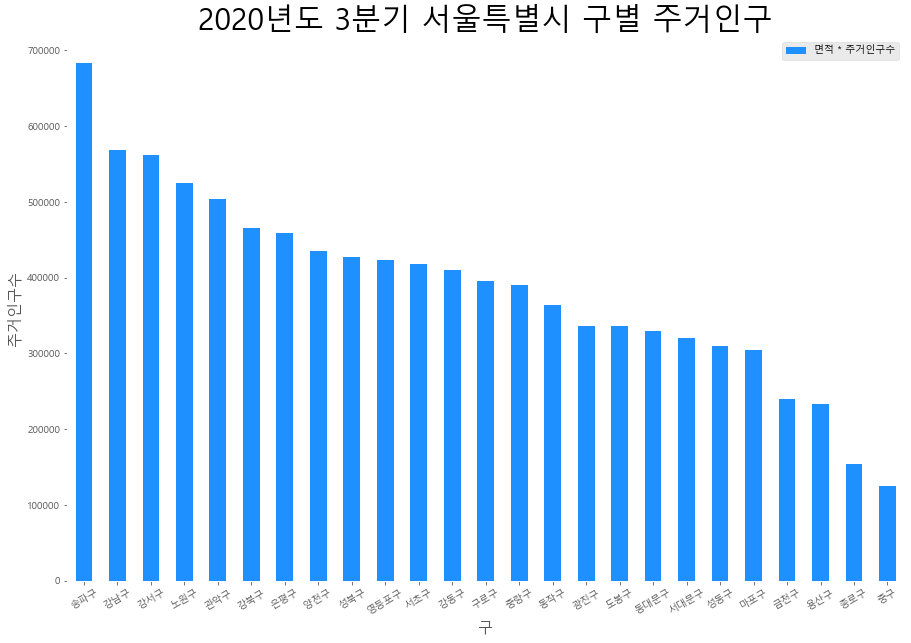

In [6]:
new_data = data[['면적 * 주거인구수']]
new_data = new_data.sort_values('면적 * 주거인구수', ascending = False)
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams["font.size"] = 10
plt.rcParams["font.family"] = 'Malgun Gothic'
newplt=new_data.plot(kind='bar', rot=30,color='dodgerblue')
#springgreen, violet, dodgerblue
newplt.set_title("2020년도 3분기 서울특별시 구별 주거인구",fontsize = 30) # 차트의 이름
newplt.set_ylabel("주거인구수",fontsize=15)
newplt.set_xlabel("구",fontsize=15)
newplt.set_facecolor('white')
plt.savefig('2020년도 3분기 서울특별시 구별 주거인구.png') #차트를 파일저장
plt.show()

### 3)유동인구 csv파일 로드 및 사전작업

In [7]:
## cvs파일업로드

data = pd.read_csv('서울특별시 구별 유동인구.csv', index_col=0, encoding='CP949', engine='python')

data.head() #작업내용 확인용 출력

,유동인구,면적
행정구역,,
종로구,99,2400
중구,336,1000
용산구,83,2200
성동구,49,1700
광진구,46,1700


In [8]:
data[['유동인구']] = data[['유동인구']].astype(int)
data[['면적']] = data['면적'].astype(int)

data['면적 * 유동인구수']=0
data[['면적 * 유동인구수']]= data[['면적 * 유동인구수']].astype(int)
data.head() #작업내용 확인용 출력

,유동인구,면적,면적 * 유동인구수
행정구역,,,
종로구,99,2400,0
중구,336,1000,0
용산구,83,2200,0
성동구,49,1700,0
광진구,46,1700,0


In [9]:
for i in range(0,len(data)):#비율 만들기(/지역어린이인구수)
            data['면적 * 유동인구수'][i] = data['유동인구'][i]*data['면적'][i]
        
data.head() #작업내용 확인용 출력

,유동인구,면적,면적 * 유동인구수
행정구역,,,
종로구,99,2400,237600
중구,336,1000,336000
용산구,83,2200,182600
성동구,49,1700,83300
광진구,46,1700,78200


### 4)바차트 그리기

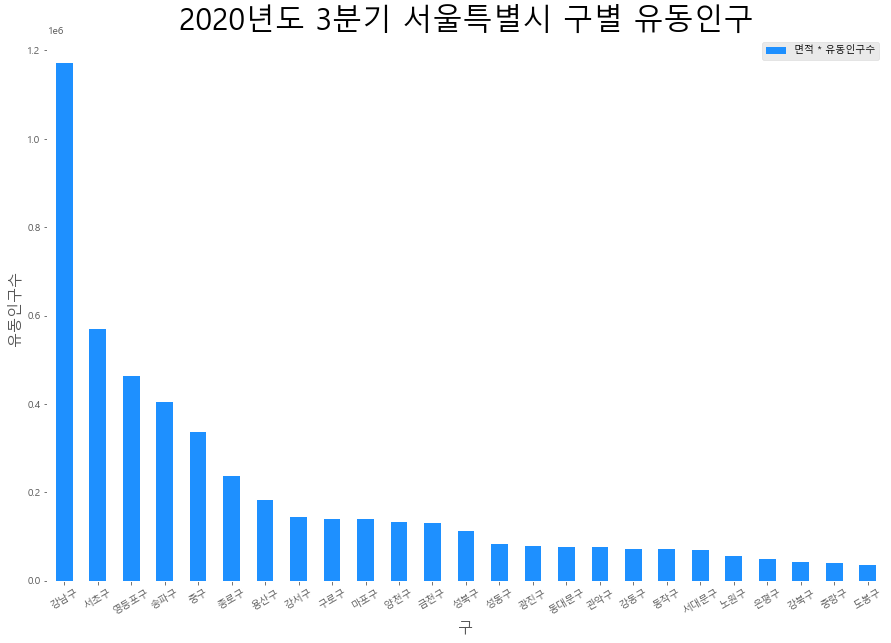

In [10]:
new_data = data[['면적 * 유동인구수']]
new_data = new_data.sort_values('면적 * 유동인구수', ascending = False)
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams["font.size"] = 10
plt.rcParams["font.family"] = 'Malgun Gothic'
newplt=new_data.plot(kind='bar', rot=30,color='dodgerblue')
#springgreen, violet, dodgerblue
newplt.set_title("2020년도 3분기 서울특별시 구별 유동인구",fontsize = 30) # 차트의 이름
newplt.set_ylabel("유동인구수",fontsize=15)
newplt.set_xlabel("구",fontsize=15)
newplt.set_facecolor('white')
plt.savefig('2020년도 3분기 서울특별시 구별 유동인구.png') #차트를 파일저장
plt.show()

# 2. 주요변수 - 임대시세

### 1)임대시세 csv파일 로드 및 사전작업

In [11]:
import pandas as pd
import numpy as np
import csv
from bs4 import BeautifulSoup

import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import SVG

In [12]:
df_price = pd.read_csv('지역별 임대시세.csv', index_col=0, encoding='CP949', engine='python')
df_price

,2018년 전체,2018년 1층,2018년 1층 외,2019년,2019년 1층,2019년 1층 외,2020년,2020년 1층,2020년 1층 외
지역명,,,,,,,,,
종로구,180684.0,217322.0,149336.0,190358.0,225458.0,158852.0,169274.0,205895.0,137462
청운효자동,130682.0,150242.0,67488.0,130149.0,154347.0,91222.0,134432.0,152656.0,99025
사직동,134027.0,148092.0,126437.0,135504.0,190743.0,111830.0,133929.0,202244.0,105045
삼청동,199095.0,242647.0,111991.0,182134.0,161827.0,227825.0,165197.0,187342.0,76618
부암동,76845.0,98860.0,56298.0,79183.0,92219.0,57456.0,103738.0,106926.0,98956
...,...,...,...,...,...,...,...,...,...
잠실3동,198367.0,257847.0,167334.0,263564.0,153105.0,294247.0,243063.0,253286.0,241189
잠실4동,255556.0,364791.0,130716.0,250176.0,372707.0,153902.0,232436.0,353252.0,197917
잠실6동,150522.0,268390.0,104525.0,165214.0,205876.0,148193.0,166013.0,195286.0,156255


In [13]:
df_price=df_price.loc[['종로구','중구','용산구', '성동구','광진구', '동대문구','중랑구', '성북구','강북구', '도봉구','노원구','은평구','서대문구', '마포구','양천구','강서구','구로구', '금천구','영등포구', '동작구','관악구', '서초구','강남구', '송파구','강동구']]
df_price.iloc[:]

,2018년 전체,2018년 1층,2018년 1층 외,2019년,2019년 1층,2019년 1층 외,2020년,2020년 1층,2020년 1층 외
지역명,,,,,,,,,
종로구,180684.0,217322.0,149336.0,190358.0,225458.0,158852.0,169274.0,205895.0,137462
중구,216687.0,221363.0,213835.0,216936.0,223798.0,213495.0,245055.0,254274.0,240558
용산구,114946.0,133676.0,98474.0,112058.0,134694.0,88814.0,117720.0,137826.0,95454
성동구,105564.0,124268.0,83982.0,102726.0,122760.0,83661.0,103535.0,122344.0,84865
광진구,92749.0,110215.0,70087.0,98635.0,119277.0,70407.0,99247.0,118023.0,73859
동대문구,105913.0,124155.0,76700.0,86033.0,107687.0,56542.0,93251.0,116355.0,59134
중랑구,73440.0,90468.0,46736.0,78048.0,94765.0,47294.0,81028.0,97761.0,56926
성북구,94707.0,108971.0,73407.0,89835.0,104251.0,65773.0,92023.0,112998.0,62448
강북구,82146.0,91286.0,63658.0,88721.0,98250.0,70351.0,86808.0,99676.0,64819


In [14]:
df_price2 = df_price.rename(columns={'2020년':'전체','2020년 1층':'1층','2020년 1층 외':'1층외'})
df_price2

,2018년 전체,2018년 1층,2018년 1층 외,2019년,2019년 1층,2019년 1층 외,전체,1층,1층외
지역명,,,,,,,,,
종로구,180684.0,217322.0,149336.0,190358.0,225458.0,158852.0,169274.0,205895.0,137462
중구,216687.0,221363.0,213835.0,216936.0,223798.0,213495.0,245055.0,254274.0,240558
용산구,114946.0,133676.0,98474.0,112058.0,134694.0,88814.0,117720.0,137826.0,95454
성동구,105564.0,124268.0,83982.0,102726.0,122760.0,83661.0,103535.0,122344.0,84865
광진구,92749.0,110215.0,70087.0,98635.0,119277.0,70407.0,99247.0,118023.0,73859
동대문구,105913.0,124155.0,76700.0,86033.0,107687.0,56542.0,93251.0,116355.0,59134
중랑구,73440.0,90468.0,46736.0,78048.0,94765.0,47294.0,81028.0,97761.0,56926
성북구,94707.0,108971.0,73407.0,89835.0,104251.0,65773.0,92023.0,112998.0,62448
강북구,82146.0,91286.0,63658.0,88721.0,98250.0,70351.0,86808.0,99676.0,64819


In [15]:
df_price2 = df_price2.loc[:,['전체','1층','1층외']]
df_price2.to_csv("서울시 임대시세(2020).csv", mode='w', encoding='CP949')
df_price2

,전체,1층,1층외
지역명,,,
종로구,169274.0,205895.0,137462
중구,245055.0,254274.0,240558
용산구,117720.0,137826.0,95454
성동구,103535.0,122344.0,84865
광진구,99247.0,118023.0,73859
동대문구,93251.0,116355.0,59134
중랑구,81028.0,97761.0,56926
성북구,92023.0,112998.0,62448
강북구,86808.0,99676.0,64819


In [16]:
df_price = df_price.transpose()

### 2)임대시세 피봇테이블을 히트맵으로 표현`

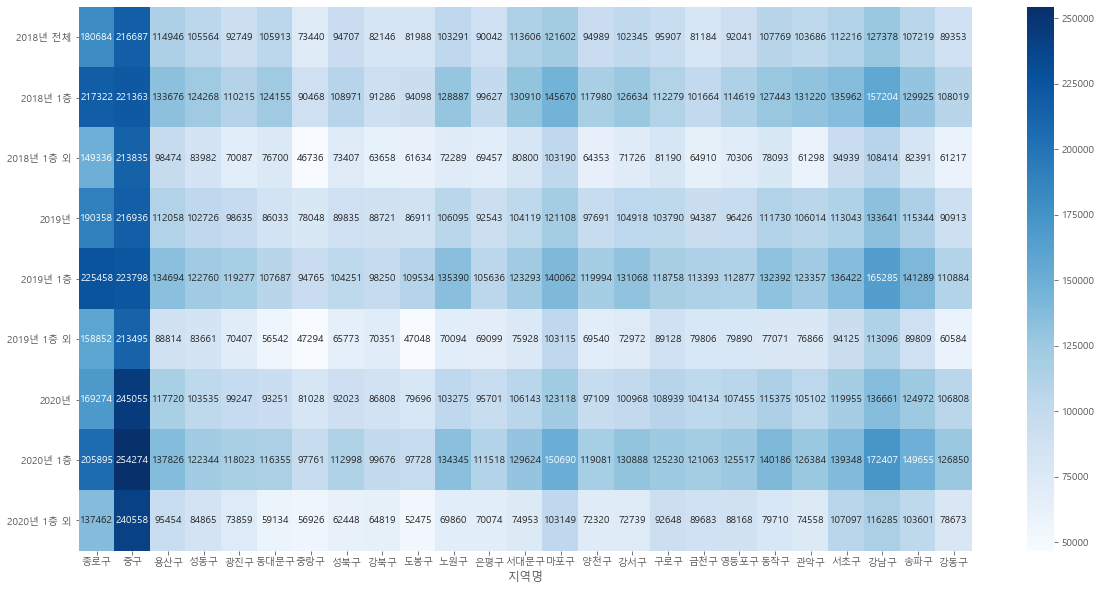

In [17]:
plt.rc("font", family="Malgun Gothic")
plt.figure(figsize=(20, 10))
sns.heatmap(df_price, cmap="Blues", annot=True, fmt=".0f")

In [18]:
df_price2 = df_price2.transpose()

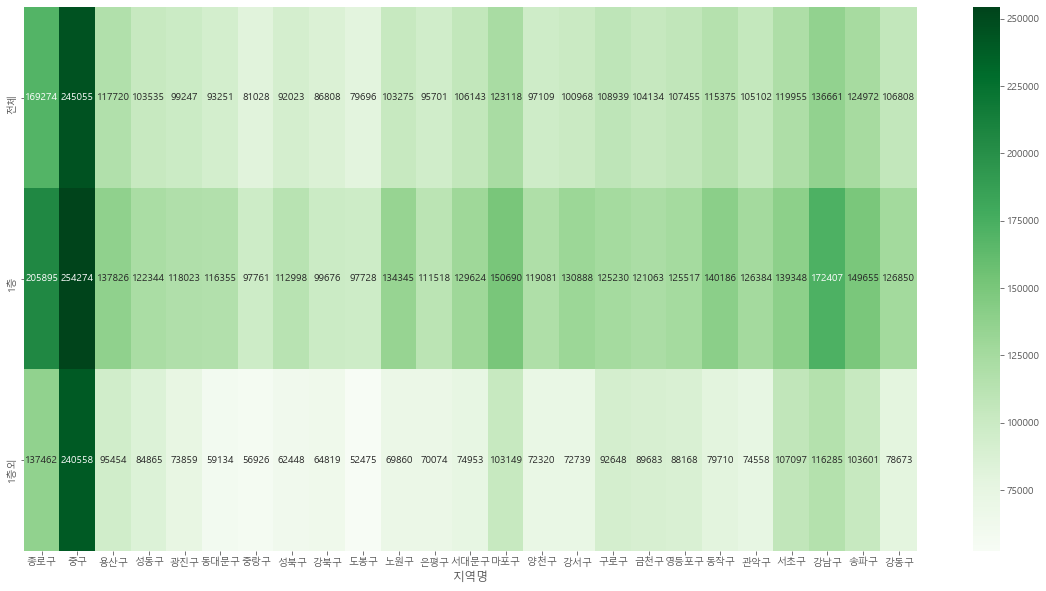

In [19]:
plt.rc("font", family="Malgun Gothic")
plt.figure(figsize=(20, 10))
sns.heatmap(df_price2, cmap="Greens", annot=True, fmt=".0f")

# 3. 주요변수 - 점포수

### 1)음식점 csv파일 로드 및 사전작업

In [20]:
data = pd.read_csv('서울특별시 구별 음식점 갯수.csv', index_col=0, encoding='CP949', engine='python')

data.head() #작업내용 확인용 출력

,점포수
행정구역,
종로구,3685
중구,3620
용산구,2564
성동구,2204
광진구,2596


In [21]:
data1 = pd.read_csv('서울특별시 구별 음식점 갯수.csv', index_col=0, encoding='CP949', engine='python')
data1 = data1.reset_index()

data1[['점포수']] = data1[['점포수']].astype(int)
data1.head()

,행정구역,점포수
0,종로구,3685
1,중구,3620
2,용산구,2564
3,성동구,2204
4,광진구,2596


In [22]:
df4=data1.copy()
df4

,행정구역,점포수
0,종로구,3685
1,중구,3620
2,용산구,2564
3,성동구,2204
4,광진구,2596
5,동대문구,2773
6,중랑구,2377
7,성북구,2278
8,강북구,2102
9,도봉구,1602


In [23]:
df_aliases = {'종로구':'Jongno-gu', '중구':'Jung-gu',
              '용산구':'Yongsan-gu', '성동구':'Seongdong-gu',
              '광진구':'Gwangjin-gu', '동대문구':'Dongdaemun-gu',
              '중랑구':'Jungnang-gu', '성북구':'Seongbuk-gu',
              '강북구':'Gangbuk-gu', '도봉구':'Dobong-gu',
              '노원구':'Nowon-gu', '은평구':'Eunpyeong-gu',
              '서대문구':'Seodaemun-gu', '마포구':'Mapo-gu',
              '양천구':'Yangcheon-gu', '강서구':'Gangseo-gu',
              '구로구':'Guro-gu', '금천구':'Geumcheon-gu',
              '영등포구':'Yeongdeungpo-gu', '동작구':'Dongjak-gu',
              '관악구':'Gwanak-gu', '서초구':'Seocho-gu',
              '강남구':'Gangnam-gu', '송파구':'Songpa-gu',
              '강동구':'Gangdong-gu'
             }
df4['행정구역']= df4['행정구역'].apply(lambda v: df_aliases.get(v, v))
df4

,행정구역,점포수
0,Jongno-gu,3685
1,Jung-gu,3620
2,Yongsan-gu,2564
3,Seongdong-gu,2204
4,Gwangjin-gu,2596
5,Dongdaemun-gu,2773
6,Jungnang-gu,2377
7,Seongbuk-gu,2278
8,Gangbuk-gu,2102
9,Dobong-gu,1602


In [24]:
with open('Seoul_map.svg','r',errors='ignore') as f:
    map_svg = f.read()
soup = BeautifulSoup(map_svg)
paths = soup.select('path[id]')
paths

[<path clip-rule="evenodd" d="M964.064,164.667
 	c-1.447,9.018-0.285,18.105-2.002,27.506c-2.068,11.332-9.018,22.101-11.502,33.507c-0.867,3.979-0.977,9.201-1.5,14.003
 	c-0.508,4.656-1.969,10.129-1.5,14.003c0.779,6.456,5.756,14.04,8.502,21.005c2.287,5.805,7.385,15.948,8.002,21.505
 	c0.539,4.856-0.953,11.628-1.502,17.504c-0.547,5.879-1.484,11.904-2,17.504c-1.135,12.346-0.799,25.368-3,36.008
 	c-1.582,7.641-5.57,14.402-7.002,21.505c-1.725,8.558-1.271,18.438-3,27.506c-6.813,0.022-13.387,0.283-19.506,1
 	c-14.793-19.111-31.705-39.509-48.51-58.013c-4.902-5.398-11.217-16.078-17.504-18.504c-7.016-2.707-17.623,0.042-22.006-7.001
 	c-4.459-4.876-9.127-9.544-14.002-14.003c-0.148-1.02-1.354-0.98-1.502-2c-3.959-4.376-8.127-8.544-12.502-12.503
 	c-2.484-9.723,2.434-16.186,3.5-24.005c1.156-1.678,0.176-5.493,0.5-8.001c0-4.168,0-8.335,0-12.503
 	c-1.914-13.504,2.932-25.383,2.502-37.009c-0.459-12.384-5.236-23.798-6.002-36.508c11.756-1.325,7.563-21.182,9.002-35.508
 	c0.838-8.333,5.449-13.907,6.502-19.5

In [25]:
colors = ['#F1EEF6', '#D4B9DA', '#C994C7', '#DF65B9', '#DD1C77', '#980043']

### 2)음식점 인포그래픽 그리기

In [26]:
for p in paths:
    tmp_df = df4.query("행정구역 == '" + p['id'] + "'")
    if tmp_df.empty:
        count=0
    else : 
        count = tmp_df.loc[tmp_df.index[0], '점포수']
        
    if count > 4000 :   color_index = 5
    elif count > 3500: color_index = 4
    elif count > 3000: color_index = 3
    elif count > 2500: color_index = 3
    elif count > 2000: color_index = 1
    else:             color_index = 0
        
    # 가져온 svg 이미지의 path 태그들의 fill 속성에 선정한 단계의 색상값 적용
    p['fill'] = colors[color_index]

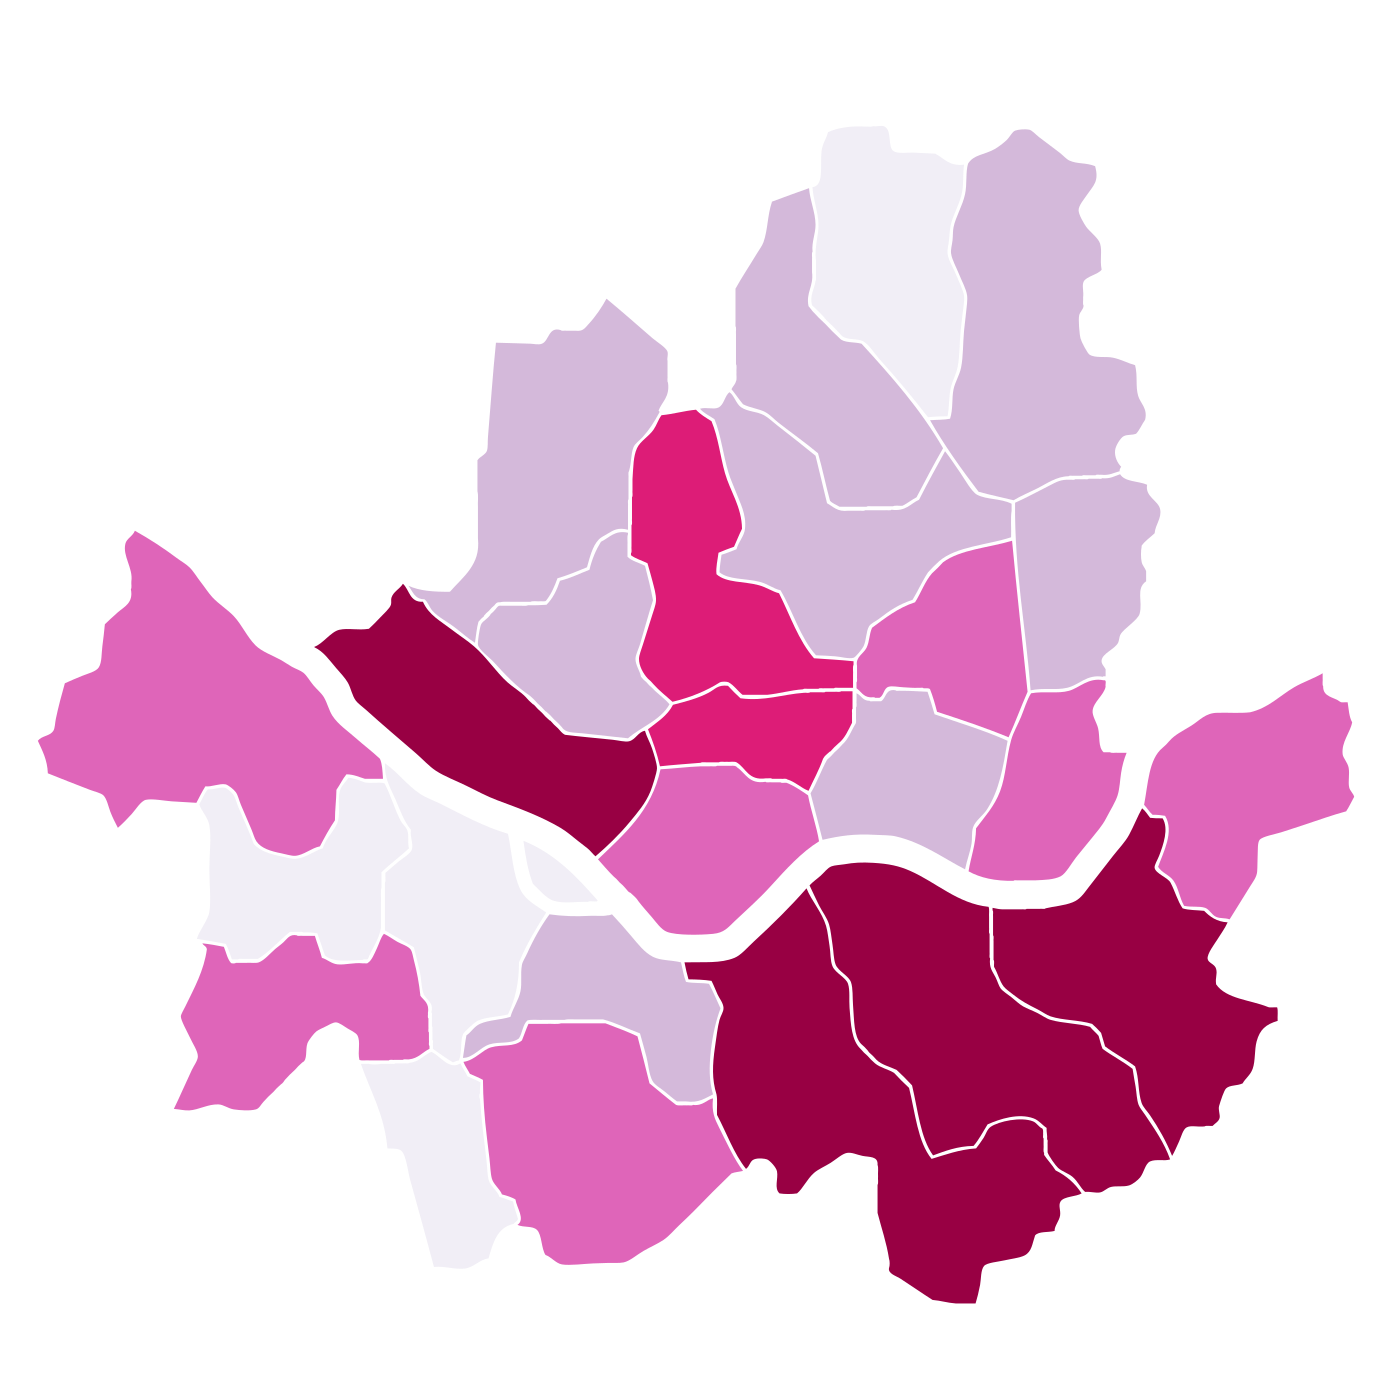

In [27]:
new_svg = soup.prettify()
SVG(new_svg)

In [28]:
with open('서울특별시 구별 음식점 갯수.svg', 'w') as f: 
    f.write(new_svg)

### 3)카페 csv파일 로드 및 사전작업

In [29]:
df_cafe = pd.read_csv('서울시 카페 점포수.csv', index_col=0, encoding='CP949', engine='python')
df_cafe

,전체 점포수
행정구역,
종로구,1283
중구,1189
용산구,828
성동구,685
광진구,758
동대문구,619
중랑구,463
성북구,682
강북구,454


In [30]:
df_cafe = df_cafe.rename(index={'종로구':'Jongno-gu', '중구':'Jung-gu',
              '용산구':'Yongsan-gu', '성동구':'Seongdong-gu',
              '광진구':'Gwangjin-gu', '동대문구':'Dongdaemun-gu',
              '중랑구':'Jungnang-gu', '성북구':'Seongbuk-gu',
              '강북구':'Gangbuk-gu', '도봉구':'Dobong-gu',
              '노원구':'Nowon-gu', '은평구':'Eunpyeong-gu',
              '서대문구':'Seodaemun-gu', '마포구':'Mapo-gu',
              '양천구':'Yangcheon-gu', '강서구':'Gangseo-gu',
              '구로구':'Guro-gu', '금천구':'Geumcheon-gu',
              '영등포구':'Yeongdeungpo-gu', '동작구':'Dongjak-gu',
              '관악구':'Gwanak-gu', '서초구':'Seocho-gu',
              '강남구':'Gangnam-gu', '송파구':'Songpa-gu',
              '강동구':'Gangdong-gu'})

### 4)카페 인포그래픽 그리기

In [31]:
for p in paths:
    
    tmp_df = df_cafe.query("행정구역 == '" + p['id'] + "'")
    
    if tmp_df.empty:
        count=0        
    else : count = tmp_df.loc[tmp_df.index[0], '전체 점포수']
    if count > 900:   color_index = 5 
    elif count > 600: color_index = 4
    elif count > 500: color_index = 3
    elif count > 400: color_index = 2
    elif count > 300:  color_index = 1
    else:             color_index = 0
    
    # 가져온 svg 이미지의 path 태그들의 fill 속성에 선정한 단계의 색상값 적용
    p['fill'] = colors[color_index]
      
    print(p)

<path clip-rule="evenodd" d="M964.064,164.667
	c-1.447,9.018-0.285,18.105-2.002,27.506c-2.068,11.332-9.018,22.101-11.502,33.507c-0.867,3.979-0.977,9.201-1.5,14.003
	c-0.508,4.656-1.969,10.129-1.5,14.003c0.779,6.456,5.756,14.04,8.502,21.005c2.287,5.805,7.385,15.948,8.002,21.505
	c0.539,4.856-0.953,11.628-1.502,17.504c-0.547,5.879-1.484,11.904-2,17.504c-1.135,12.346-0.799,25.368-3,36.008
	c-1.582,7.641-5.57,14.402-7.002,21.505c-1.725,8.558-1.271,18.438-3,27.506c-6.813,0.022-13.387,0.283-19.506,1
	c-14.793-19.111-31.705-39.509-48.51-58.013c-4.902-5.398-11.217-16.078-17.504-18.504c-7.016-2.707-17.623,0.042-22.006-7.001
	c-4.459-4.876-9.127-9.544-14.002-14.003c-0.148-1.02-1.354-0.98-1.502-2c-3.959-4.376-8.127-8.544-12.502-12.503
	c-2.484-9.723,2.434-16.186,3.5-24.005c1.156-1.678,0.176-5.493,0.5-8.001c0-4.168,0-8.335,0-12.503
	c-1.914-13.504,2.932-25.383,2.502-37.009c-0.459-12.384-5.236-23.798-6.002-36.508c11.756-1.325,7.563-21.182,9.002-35.508
	c0.838-8.333,5.449-13.907,6.502-19.504c9.998-4

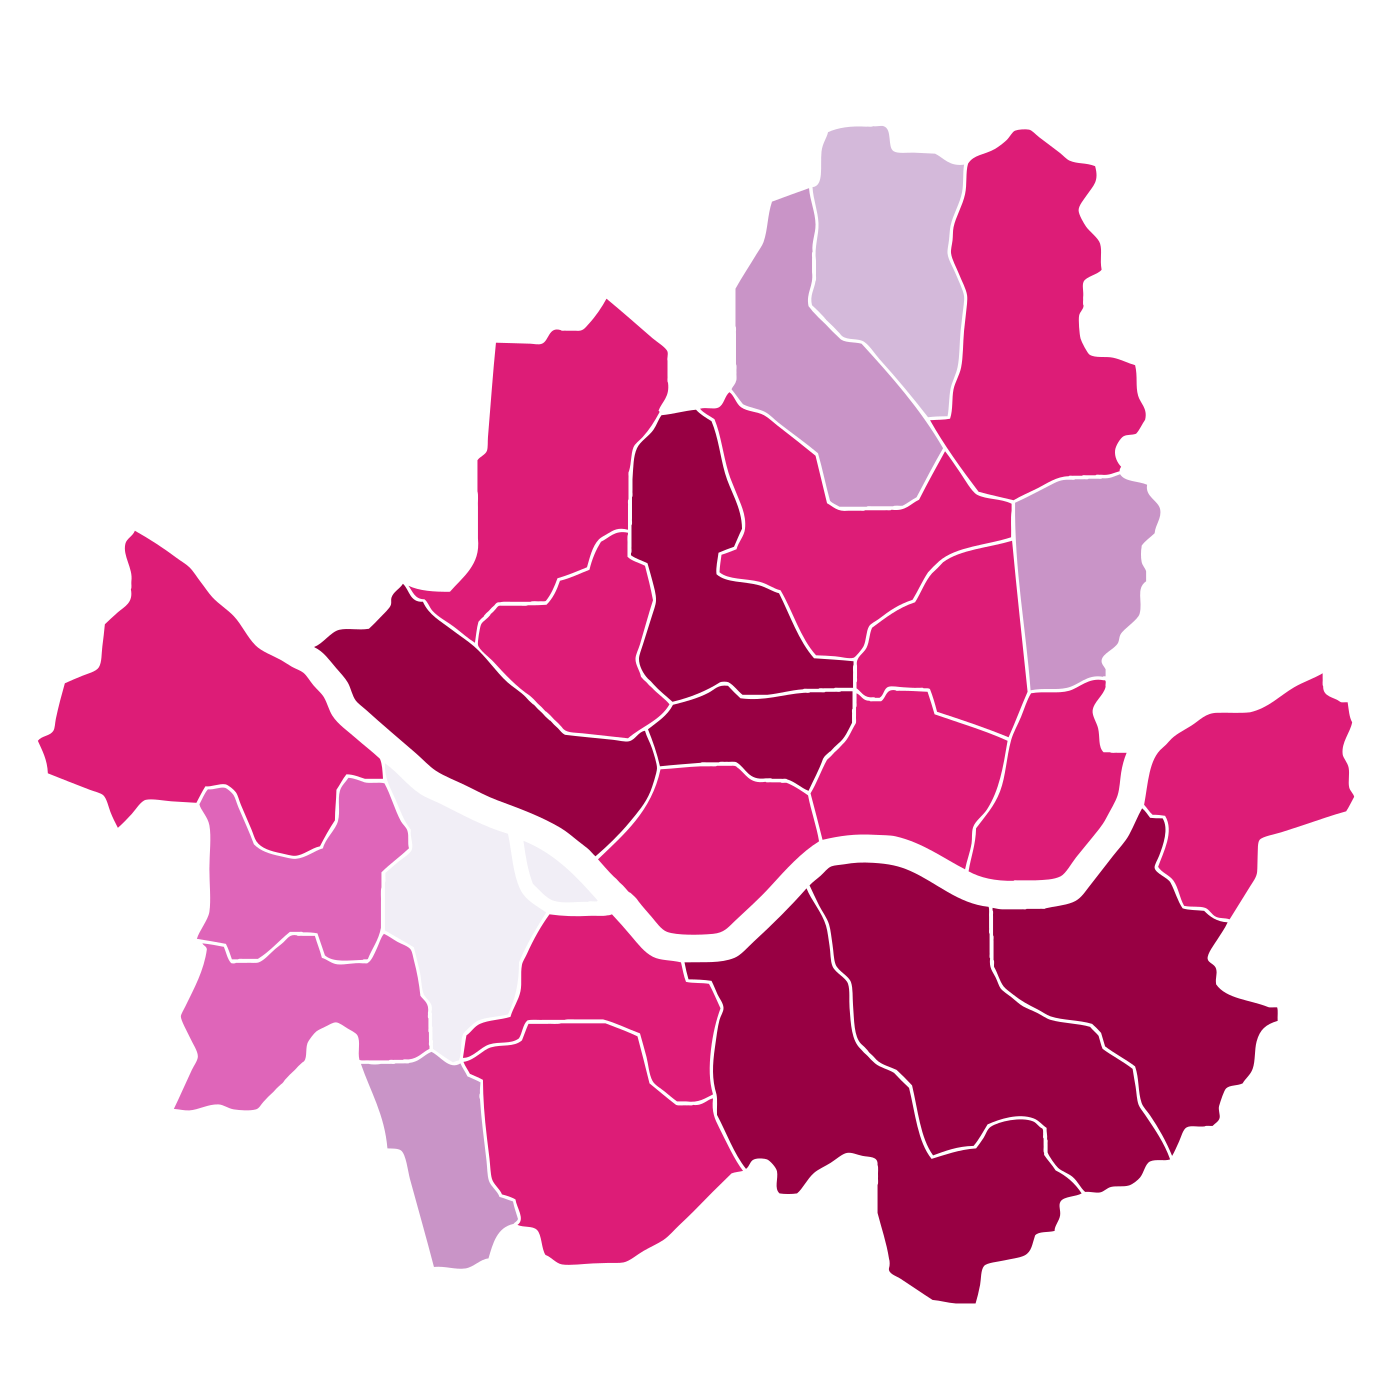

In [32]:
new_svg = soup.prettify()

# jupyter에서 svg 이미지 표시하기
# -> SVG(소스문자열)  혹은 SVG(파일경로)
SVG(new_svg)

In [33]:
with open('서울시 카페_인포그래픽.svg', 'w') as f: #옐로우카펫 new_svg이름으로 저장
    f.write(new_svg)

### 5)술집 csv파일 로드 및 사전작업

In [34]:
import pandas as pd

pd.set_option('mode.chained_assignment',  None)
import numpy as np
###################
from matplotlib import pyplot as plt
from matplotlib import rcParams, style
style.use('ggplot')

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
###################
from bs4 import BeautifulSoup
from IPython.display import SVG

In [35]:
data_drink = pd.read_csv('술집.csv', index_col=0, encoding='CP949', engine='python')
data_drink.head()

,전체점포수,프랜차이즈점포수,일반점포수
지역,,,
종로구,630,69,561
중구,500,45,455
용산구,486,45,441
성동구,331,47,284
광진구,659,74,585


In [36]:
with open('Seoul_map.svg','r',errors='ignore') as f:
    map_svg = f.read()
df_aliases = {'종로구':'Jongno-gu', '중구':'Jung-gu',
              '용산구':'Yongsan-gu', '성동구':'Seongdong-gu',
              '광진구':'Gwangjin-gu', '동대문구':'Dongdaemun-gu',
              '중랑구':'Jungnang-gu', '성북구':'Seongbuk-gu',
              '강북구':'Gangbuk-gu', '도봉구':'Dobong-gu',
              '노원구':'Nowon-gu', '은평구':'Eunpyeong-gu',
              '서대문구':'Seodaemun-gu', '마포구':'Mapo-gu',
              '양천구':'Yangcheon-gu', '강서구':'Gangseo-gu',
              '구로구':'Guro-gu', '금천구':'Geumcheon-gu',
              '영등포구':'Yeongdeungpo-gu', '동작구':'Dongjak-gu',
              '관악구':'Gwanak-gu', '서초구':'Seocho-gu',
              '강남구':'Gangnam-gu', '송파구':'Songpa-gu',
              '강동구':'Gangdong-gu'
             }
colors = ['#F1EEF6', '#D4B9DA', '#C994C7', '#DF65B9', '#DD1C77', '#980043']

In [37]:
info_drink = data_drink[['전체점포수']]
info_drink=info_drink.reset_index()
info_drink['지역']= info_drink['지역'].apply(lambda v: df_aliases.get(v, v))
info_drink.head()

,지역,전체점포수
0,Jongno-gu,630
1,Jung-gu,500
2,Yongsan-gu,486
3,Seongdong-gu,331
4,Gwangjin-gu,659


### 6)술집 인포그래픽 그리기

In [38]:
soup = BeautifulSoup(map_svg)
paths = soup.select('path[id]')
paths
for p in paths:
    tmp_df = info_drink.query("지역 == '" + p['id'] + "'")
    if tmp_df.empty:
        count=0
    else : 
        count = tmp_df.loc[tmp_df.index[0], '전체점포수']
        
    if count > 700 :   color_index = 5
    elif count > 600: color_index = 4
    elif count > 500: color_index = 3
    elif count > 400: color_index = 3
    elif count > 300: color_index = 1
    else:             color_index = 0
        
    # 가져온 svg 이미지의 path 태그들의 fill 속성에 선정한 단계의 색상값 적용
    p['fill'] = colors[color_index]

In [39]:
new_svg = soup.prettify()
SVG(new_svg)
with open('술집전체점포수(인포).svg', 'w') as f:
    f.write(new_svg)

# 4. 세부변수 - 음식점 리뷰

### 6)술집 인포그래픽 그리기

### 1)구 별로 음식점 리뷰 수 크롤링

In [40]:
import os
import sys
import urllib.request
import datetime
import time
import csv
import json
import pandas as pd
from pandas import DataFrame

client_id = 'q9nQjHDVAPrMYXEOVvRK'
client_secret = 'GuygK5aQ5H'

In [41]:
#[CODE 1]
def getRequestUrl(url):    
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_secret)
    
    try: 
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None

In [42]:
#[CODE 2]
def getNaverSearch(node, srcText, start, display):    
    base = "https://openapi.naver.com/v1/search"
    node = "/%s.json" % node
    parameters = "?query=%s&start=%s&display=%s" % (urllib.parse.quote(srcText), start, display)
    
    url = base + node + parameters    
    responseDecode = getRequestUrl(url)   #[CODE 1]
    
    if (responseDecode == None):
        return None
    else:
        return json.loads(responseDecode)

In [43]:
#[CODE 3]
def getPostData(post, jsonResult, cnt):

    pDate = post['postdate']
    title = post['title']
    description = post['description']
    bloggername = post['bloggername']
    bloggerlink = post['bloggerlink']
    
    
    jsonResult.append({'cnt':cnt, 'title':title,'description': description, 'bloggername':bloggername,
                       'bloggerlink':bloggerlink, 'pDate':pDate})
    
    return

In [44]:
#[CODE 0]
def kim():
    
    srcText = ['강남구 맛집','강동구 맛집','강북구 맛집','강서구 맛집','관악구 맛집','광진구 맛집',
              '구로구 맛집','금천구 맛집','노원구 맛집','도봉구 맛집','동대문구 맛집','동작구 맛집',
              '마포구 맛집','서대문구 맛집','서초구 맛집','성동구 맛집','성북구 맛집','송파구 맛집',
              '양천구 맛집','영등포구 맛집','용산구 맛집','은평구 맛집','종로구 맛집','중구 맛집',
              '중랑구 맛집']
    total_all = []
    node = 'blog'
    for src in srcText:
        cnt = 0
        jsonResult = []

        jsonResponse = getNaverSearch(node, src, 1, 100)  #[CODE 2]
        total = jsonResponse['total']

        while ((jsonResponse != None) and (jsonResponse['display'] != 0)):         
            for post in jsonResponse['items']:
                cnt += 1
                getPostData(post, jsonResult, cnt)  #[CODE 3]       

            start = jsonResponse['start'] + jsonResponse['display']
            jsonResponse = getNaverSearch(node, src, start, 100)  #[CODE 2] 
        print ('%s 전체 검색 : %d건 ' % (src,total))
        total_all.append(total)
        
    data = {'맛집':srcText,'검색 개수':total_all}
    restaurant = DataFrame(data)
    restaurant.to_csv('서울특별시 구별 맛집 리뷰갯수.csv',index=False, encoding="utf-8-sig")   
    
    
if __name__ == '__main__':
    kim()

HTTP Error 400: Bad Request
[2020-12-21 02:20:21.693684] Error for URL : https://openapi.naver.com/v1/search/blog.json?query=%EA%B0%95%EB%82%A8%EA%B5%AC%20%EB%A7%9B%EC%A7%91&start=1001&display=100
강남구 맛집 전체 검색 : 382175건 
HTTP Error 400: Bad Request
[2020-12-21 02:20:25.106239] Error for URL : https://openapi.naver.com/v1/search/blog.json?query=%EA%B0%95%EB%8F%99%EA%B5%AC%20%EB%A7%9B%EC%A7%91&start=1001&display=100
강동구 맛집 전체 검색 : 111083건 
HTTP Error 400: Bad Request
[2020-12-21 02:20:28.450916] Error for URL : https://openapi.naver.com/v1/search/blog.json?query=%EA%B0%95%EB%B6%81%EA%B5%AC%20%EB%A7%9B%EC%A7%91&start=1001&display=100
강북구 맛집 전체 검색 : 53484건 
HTTP Error 400: Bad Request
[2020-12-21 02:20:31.932250] Error for URL : https://openapi.naver.com/v1/search/blog.json?query=%EA%B0%95%EC%84%9C%EA%B5%AC%20%EB%A7%9B%EC%A7%91&start=1001&display=100
강서구 맛집 전체 검색 : 56919건 
HTTP Error 400: Bad Request
[2020-12-21 02:20:35.360915] Error for URL : https://openapi.naver.com/v1/search/blog.json

### 2)크롤링해서 만든 csv파일을 가져오기

In [45]:
data = pd.read_csv('서울특별시 구별 맛집 리뷰갯수.csv', encoding='utf-8', engine='python')

data = data.reset_index()
data.rename(columns={'index': '맛집', '맛집': '검색 개수'}, inplace=True)
data

,맛집,검색 개수
0,강남구 맛집,382175
1,강동구 맛집,111083
2,강북구 맛집,53484
3,강서구 맛집,56919
4,관악구 맛집,14820
5,광진구 맛집,123773
6,구로구 맛집,46978
7,금천구 맛집,43049
8,노원구 맛집,63443
9,도봉구 맛집,38014


### 3) 가로바차트 만들기

In [46]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

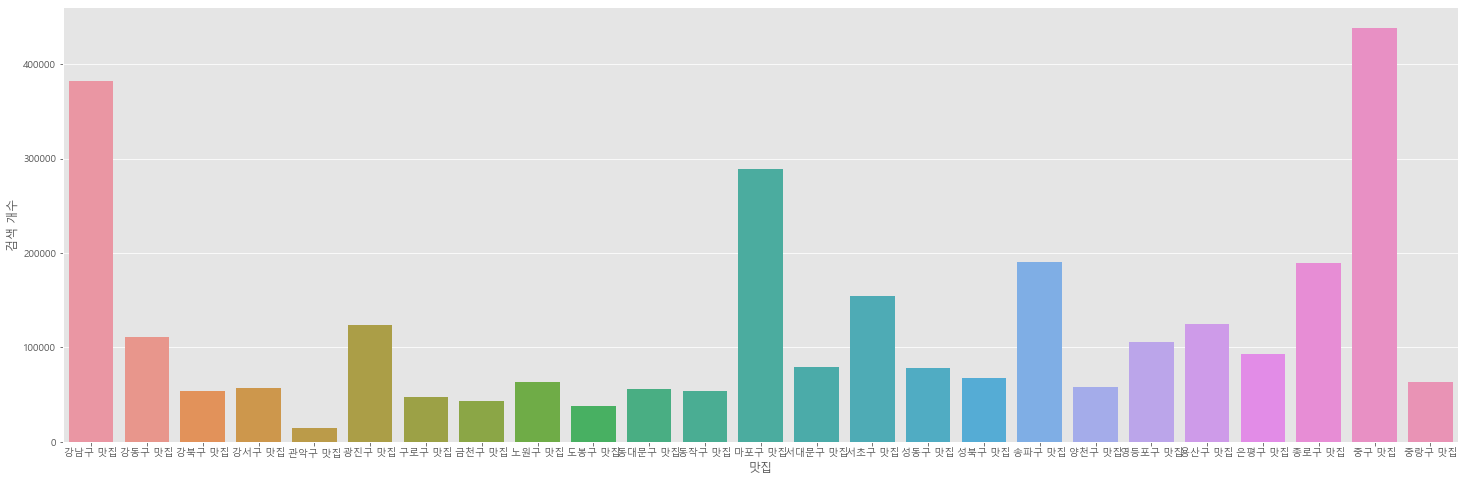

In [47]:
plt.figure(figsize=[25,8])

sns.barplot(x='맛집', y='검색 개수', data=data)

plt.savefig('서울시 구별 맛집 리뷰갯수.png')

# 5. 세부변수 - 카페 역세권

In [48]:
## 데이터 파일 읽어오기(소상공인)

In [49]:
import pandas as pd
import folium
cafe_data = pd.read_csv('소상공인.csv', index_col=0, encoding='CP949', engine='python')

In [50]:
#상권업종소분류코드가 Q12A01인 것이 카페이므로 Q12A01만 사용하기

In [51]:
cafe_data = cafe_data.reset_index()
idx = cafe_data[cafe_data['상권업종소분류코드']!='Q12A01'].index
cafe_data = cafe_data.drop(idx)
cafe_data

,상호명,지점명,상권업종소분류코드,지번주소,경도,위도
0,커피빈코리아선릉로93길점,코리아선릉로93길점,Q12A01,서울특별시 강남구 역삼동 696-42,127.047883,37.505675
4,고려대학교교육관쎄리오점,NaN,Q12A01,서울특별시 성북구 안암동5가 1-2,127.031702,37.588485
7,스완카페트,NaN,Q12A01,서울특별시 영등포구 대림동 604-56,126.897710,37.503693
25,왕실,NaN,Q12A01,서울특별시 중구 명동2가 105,126.982419,37.562274
29,커피빈,코리아교대점,Q12A01,서울특별시 서초구 서초동 1657-5,127.014217,37.492388
...,...,...,...,...,...,...
367494,와플대학,상일동역캠퍼스,Q12A01,서울특별시 강동구 고덕동 217,127.164702,37.558063
367519,hebecoffee,NaN,Q12A01,서울특별시 중구 필동2가 98-1,126.995981,37.558768
367520,티랩차연구소,NaN,Q12A01,서울특별시 강남구 역삼동 642-16,127.035662,37.500836
367521,사사이프로젝트,NaN,Q12A01,서울특별시 광진구 화양동 489,127.076909,37.545822


In [52]:
#맵 만들고

In [53]:
map = folium.Map(location=[37.560284, 126.975334], zoom_start = 12)
map.save('map.html')

In [54]:
#구로 열 만들기

In [55]:
gu = []
gu_real = []
for address in cafe_data.지번주소:
    gu.append(str(address).split())
for _gu in gu:
    gu_real.append(_gu[1])
cafe_data['구'] = gu_real
cafe_data.head()

,상호명,지점명,상권업종소분류코드,지번주소,경도,위도,구
0,커피빈코리아선릉로93길점,코리아선릉로93길점,Q12A01,서울특별시 강남구 역삼동 696-42,127.047883,37.505675,강남구
4,고려대학교교육관쎄리오점,NaN,Q12A01,서울특별시 성북구 안암동5가 1-2,127.031702,37.588485,성북구
7,스완카페트,NaN,Q12A01,서울특별시 영등포구 대림동 604-56,126.897710,37.503693,영등포구
25,왕실,NaN,Q12A01,서울특별시 중구 명동2가 105,126.982419,37.562274,중구
29,커피빈,코리아교대점,Q12A01,서울특별시 서초구 서초동 1657-5,127.014217,37.492388,서초구


In [56]:
#서울시 행정구역 데이터(seoul_muncipalities_geo.json)를 이용한 경계선 긋기

In [57]:
import json
with open('./seoul_municipalities_geo.json',mode='rt',encoding='utf-8') as f:
    geo = json.loads(f.read())
    f.close()
folium.GeoJson(
    geo,
    name='seoul_municipalities'
).add_to(map)

In [58]:
#카페들 지도에 표시

In [59]:
cafe_data = cafe_data.fillna("") # NaN 값 없애준다.
for i,center in cafe_data.iterrows():
        folium.Circle(
            location=[center['위도'], center['경도']],
            tooltip='상호명 : '+center['상호명']+'\n지점명 : ' + center['지점명'],
            color='deepskyblue',
            #fill=True,
            #fill_color = 'red',
            radius = 1
        ).add_to(map)

In [60]:
# 데이터 파일 읽어오기(지하철)

In [61]:
import pandas as pd

subway_data = pd.read_csv('지하철데이터.shp.csv', index_col=0, encoding='CP949', engine='python')

In [62]:
#전화번호 데이터 들어있는 열 이름 바꾸기

In [63]:
subway_data.rename(columns={'Unnamed: 7': '전화번호'}, inplace=True)

In [64]:
#경기도 또는 인천 데이터가 포함되어 있어 삭제

In [65]:
delete_list = ['고양시 덕양구', '경기도 의정부시', '광명시','부평구','성남시']

for dl in delete_list:
    idx = subway_data[subway_data['구']==dl].index
    subway_data = subway_data.drop(idx)
subway_data

,연번,역명,호선,구,동,상세주소,전화번호,경도,위도,상태
No,,,,,,,,,,
1,1,서울,1,중구,봉래동,서울특별시 중구 봉래동2가 122 서울역(1호선),6110-1331,126.969563,37.558156,정좌표
2,2,시청,1,중구,정동,서울특별시 중구 정동 5-5 시청역(1호선),6110-1321,126.976919,37.565597,정좌표
3,3,종각,1,종로구,종로1가,서울특별시 종로구 종로1가 54 종각지하철역사,6110-1311,126.981390,37.570222,정좌표
5,5,종로5가,1,종로구,종로5가,서울특별시 종로구 종로5가 82-1 1호선 종로5가역,6110-1291,127.001925,37.571020,정좌표
6,6,동대문,1,종로구,창신동,서울특별시 종로구 창신동 492-1 1호선 동대문역(1호선),6110-1281,127.011233,37.571759,정좌표
...,...,...,...,...,...,...,...,...,...,...
272,272,복정,8,송파구,장지동,서울특별시 송파구 장지동 596-21 복정역,6311-8200,127.126681,37.470649,정좌표
4,4,종로3가,1,종로구,종로3가,서울특별시 종로3가 10-5 1호선 종로3가역(1호선),6110-1301,126.992297,37.570696,정좌표
39,39,봉천,2,관악구,봉천동,서울툭별시 관악구 봉천동 979-7 2호선 봉천역사,6110-2291,126.941699,37.483586,정좌표


In [66]:
#각 지하철을 중심으로 500미터 반경으로 원을 그리고, 지하철은 노란색으로 표시

In [67]:
subway_data = subway_data.fillna("")
for i,center in subway_data.iterrows():
        folium.Circle(
            location=[center['위도'], center['경도']],
            tooltip='역명 : '+center['역명']+' '+str(center['호선'])+'호선',
            color='gold',
            #fill=True,
            #fill_color = 'red',
            radius = 1
        ).add_to(map)
        folium.Circle(
            location=[center['위도'], center['경도']],
            color='magenta',
            #fill=True,
            fill_color='magenta',
            radius = 500            #지하철 역세권의 정의는 500m
        ).add_to(map)
map.save('map2.html')

In [68]:
#함수정의 -> 위도, 경도 좌표로 거리 계산
import math
from math import *
def distance(lat1, lon1, lat2, lon2):
    theta = lon1 - lon2;
    dist = math.sin(deg2rad(lat1)) * math.sin(deg2rad(lat2)) + math.cos(deg2rad(lat1)) * math.cos(deg2rad(lat2)) * math.cos(deg2rad(theta))
    dist = math.acos(dist)
    dist = rad2deg(dist)
    dist = dist * 60 * 1.1515
    dist = dist * 1609.344     #meter
    return dist
#This function converts decimal degrees to radians
def deg2rad(deg):
    return (deg * math.pi / 180.0)

#This function converts radians to decimal degrees
def rad2deg(rad):
    return (rad * 180 / math.pi)

In [69]:
#지하철 역으로부터 500m안에 있는 카페들 개수 구하기
data_all = []
for i in subway_data.index: #259
        for j in cafe_data.index:   #19917 
            if(distance(subway_data._get_value(i,'위도'),subway_data._get_value(i,'경도'),cafe_data._get_value(j,'위도'),cafe_data._get_value(j,'경도'))<=500):
                data_all.append(cafe_data._get_value(j,'상호명'))
        print(i)
print('완료!')

1
2
3
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
247
248
251
252
262
263
264
265
266
267
268
269
270
271
272
4
39
113
246
완료!


In [70]:
#5,158,503개의 연산
data_set = set(data_all)
data_all = list(data_set)
len(data_all)

7870

In [71]:
#구별로 500m안에 들어가는 데이터 수 구하기
#_get_value 함수 사용 이유 : 프로그램이 빨라짐
#
#구별로 반복이 많기 때문에(#총 : 128,962,575개의 연산 구별 : 5,158,503개의 연산) iterrows쓰면 프로그램이 굉장히 느려짐 따라서 index를 통해 반복문 조절
#pypy로 하면 더 빨라져서 사용하려고 했으나 파이참 pypy보다 주피터 노트북이 빠름
#멀티 프로세싱을 이용하면 더 빨라지지만 해봤자 집은 코어가 4개 뿐이라 3.xx배 빨라지는 정도. 따라서 이정도 속도로 만족하기 때문에 사용 X
data2_all = []
data2 = []
gu_all = ['종로구','중구','용산구', '성동구','광진구',
          '동대문구','중랑구', '성북구','강북구', '도봉구',
          '노원구','은평구','서대문구', '마포구','양천구',
          '강서구','구로구', '금천구','영등포구', '동작구',
          '관악구', '서초구','강남구', '송파구','강동구']
print('START!')
for gu in gu_all:
    data2=[]
    for i in subway_data.index: #259
            for j in cafe_data.index:   #19917 
                if(gu==subway_data._get_value(i,'구') and gu==cafe_data._get_value(j,'구') and distance(subway_data._get_value(i,'위도'),subway_data._get_value(i,'경도'),cafe_data._get_value(j,'위도'),cafe_data._get_value(j,'경도'))<=500):
                    data2.append(cafe_data._get_value(j,'상호명'))
    data2_all.append(data2)
    print(len(data2_all),' ',gu, '저장 완료!')
print('FINISH!')

START!
1   종로구 저장 완료!
2   중구 저장 완료!
3   용산구 저장 완료!
4   성동구 저장 완료!
5   광진구 저장 완료!
6   동대문구 저장 완료!
7   중랑구 저장 완료!
8   성북구 저장 완료!
9   강북구 저장 완료!
10   도봉구 저장 완료!
11   노원구 저장 완료!
12   은평구 저장 완료!
13   서대문구 저장 완료!
14   마포구 저장 완료!
15   양천구 저장 완료!
16   강서구 저장 완료!
17   구로구 저장 완료!
18   금천구 저장 완료!
19   영등포구 저장 완료!
20   동작구 저장 완료!
21   관악구 저장 완료!
22   서초구 저장 완료!
23   강남구 저장 완료!
24   송파구 저장 완료!
25   강동구 저장 완료!
FINISH!


In [72]:
#각 구별로 역세권(지하철 역으로부터 500m) 안에 있는 카페 개수 구하기
for i in range(25):
    data2_set = set(data2_all[i])    #중복제거
    data2_all[i] = list(data2_set)   #중복제거
    print(len(data2_all[i]))


711
721
387
342
482
113
129
284
109
72
272
284
71
893
163
211
158
86
402
213
230
422
557
431
354


In [73]:
#구별로 몇개의 카페가 존재하는지 검사

In [74]:
gu_all = ['종로구','중구','용산구', '성동구','광진구',
          '동대문구','중랑구', '성북구','강북구', '도봉구',
          '노원구','은평구','서대문구', '마포구','양천구',
          '강서구','구로구', '금천구','영등포구', '동작구',
          '관악구', '서초구','강남구', '송파구','강동구']
gu_data_all=[]
print('START!')
for gu in gu_all:
    gu_data=[]
    for i in cafe_data.index:   #19917 
        if(gu==cafe_data._get_value(i,'구')):
            gu_data.append(cafe_data._get_value(i,'상호명'))
    gu_data_all.append(gu_data)
    print(len(gu_data_all),' ',gu,' 완료!')
print("FINISH!")

START!
1   종로구  완료!
2   중구  완료!
3   용산구  완료!
4   성동구  완료!
5   광진구  완료!
6   동대문구  완료!
7   중랑구  완료!
8   성북구  완료!
9   강북구  완료!
10   도봉구  완료!
11   노원구  완료!
12   은평구  완료!
13   서대문구  완료!
14   마포구  완료!
15   양천구  완료!
16   강서구  완료!
17   구로구  완료!
18   금천구  완료!
19   영등포구  완료!
20   동작구  완료!
21   관악구  완료!
22   서초구  완료!
23   강남구  완료!
24   송파구  완료!
25   강동구  완료!
FINISH!


In [75]:
#기준값은 평균으로 각 구별로 퍼센트 구하기, 평균을 기준 값으로 사용할 것임
import numpy
new_data = []
for i in range(25):
    new_data.append(len(data2_all[i])/len(gu_data_all[i]))
for i in range(25):
    new_data[i] = round(new_data[i]*100)
    print(gu_all[i],new_data[i],'퍼센트(%)')
print('기준 값 : ',numpy.mean(new_data))

종로구 62 퍼센트(%)
중구 74 퍼센트(%)
용산구 53 퍼센트(%)
성동구 57 퍼센트(%)
광진구 59 퍼센트(%)
동대문구 22 퍼센트(%)
중랑구 35 퍼센트(%)
성북구 47 퍼센트(%)
강북구 38 퍼센트(%)
도봉구 23 퍼센트(%)
노원구 52 퍼센트(%)
은평구 50 퍼센트(%)
서대문구 9 퍼센트(%)
마포구 60 퍼센트(%)
양천구 34 퍼센트(%)
강서구 25 퍼센트(%)
구로구 27 퍼센트(%)
금천구 21 퍼센트(%)
영등포구 38 퍼센트(%)
동작구 46 퍼센트(%)
관악구 40 퍼센트(%)
서초구 30 퍼센트(%)
강남구 20 퍼센트(%)
송파구 43 퍼센트(%)
강동구 56 퍼센트(%)
기준 값 :  40.84


In [76]:
#이 수는 전체를 나타내는 수임! 500미터 반경에 있는 카페 수/전체 점포수
print(7870/19917)

0.39513983029572725


In [78]:
new_data_to = {'구':gu_all, '역세권':new_data}#csv파일로 보내기 위해 저장
tocsv = pd.DataFrame(new_data_to) # converting to DataFrame

tocsv.to_csv('역세권_구.csv',encoding='utf-8-sig')

### 6. 세부변수 - 술집(직장인구, 대학교)

### 1)각종 csv파일 로드 및 사전작업

In [79]:
import pandas as pd
import numpy as np
import csv
from bs4 import BeautifulSoup

import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import SVG

In [80]:
df_univ = pd.read_csv('서울시 대학 및 전문대학 DB 정보.csv', index_col=0, encoding='CP949', engine='python')
df_univ.head()

,연도,학교종류,학교명,본분교,학교상태,설립,우편번호,주소,도로명주소,행정시,행정구,행정동,전화번호,팩스번호,홈페이지
키값,,,,,,,,,,,,,,,
BE_LiST23-0034,2013,일반대학,서울시립대학교,본교,기존,공립,NaN,서울 동대문구 서울시립대로 163 (전농동 90번지),NaN,서울특별시,동대문구,휘경2동,02-6490-6114,02-2210-5576,http://www.uos.ac.kr
BE_LiST23-0035,2013,전문대학(3년제),서울여자간호대학교,본교,기존,사립,NaN,서울 서대문구 홍제3동 서울여자간호대학,NaN,서울특별시,서대문구,홍제2동,02-2287-1700,02-395-8018,http://www.snjc.ac.kr
BE_LiST23-0036,2013,일반대학,서울여자대학교,본교,기존,사립,NaN,서울특별시 노원구 화랑로 621 서울여자대학교,NaN,서울특별시,노원구,공릉2동,02-970-5114,02-978-7931,http://www.swu.ac.kr
BE_LiST23-0037,2013,전문대학(2년제),서일대학교,본교,학교명 변경,사립,NaN,서울 중랑구 서일대학길 22(면목동 49-3) 서일대학교,NaN,서울특별시,중랑구,면목제3.8동,02-490-7300,02-493-2576,http://www.seoil.ac.kr
BE_LiST23-0038,2013,일반대학,성공회대학교,본교,기존,사립,NaN,서울 구로구 항동 성공회대학교,NaN,서울특별시,구로구,오류2동,02-2610-4142,02-2610-4248,http://www.skhu.ac.kr


In [81]:
df_univ = df_univ[df_univ['학교종류']=='일반대학']

In [82]:
df_univ = df_univ.loc[:,['학교명','행정구']]
df_univ.head()

,학교명,행정구
키값,,
BE_LiST23-0034,서울시립대학교,동대문구
BE_LiST23-0036,서울여자대학교,노원구
BE_LiST23-0038,성공회대학교,구로구
BE_LiST23-0039,성균관대학교,종로구
BE_LiST23-0040,성신여자대학교,성북구


In [83]:
df_univ_count = df_univ.groupby('행정구').size().reset_index().rename(columns={0:'대학교 수'})
df_univ_count.head()

,행정구,대학교 수
0,강서구,1
1,관악구,1
2,광진구,3
3,구로구,2
4,노원구,5


In [84]:
df_pub = pd.read_csv('서울시 술집 점포수.csv', index_col=0, encoding='CP949', engine='python')
df_pub = df_pub.reset_index()
df_pub.head()

,지역,전체점포수,프랜차이즈점포수,일반점포수
0,종로구,630,69,561
1,중구,500,45,455
2,용산구,486,45,441
3,성동구,331,47,284
4,광진구,659,74,585


In [85]:
df_pub.columns = ['행정구','전체 점포수','프랜차이즈점포수','일반점포수']
df_pub.head()

,행정구,전체 점포수,프랜차이즈점포수,일반점포수
0,종로구,630,69,561
1,중구,500,45,455
2,용산구,486,45,441
3,성동구,331,47,284
4,광진구,659,74,585


In [86]:
df = pd.merge(df_univ_count, df_pub, on = "행정구")
df

,행정구,대학교 수,전체 점포수,프랜차이즈점포수,일반점포수
0,강서구,1,779,95,684
1,관악구,1,765,95,670
2,광진구,3,659,74,585
3,구로구,2,662,76,586
4,노원구,5,447,59,388
5,도봉구,1,344,32,312
6,동대문구,3,538,52,486
7,동작구,3,478,62,416
8,마포구,2,1012,99,913
9,서대문구,6,537,55,482


### 2)대학과 점포수 사이의 관계 시각화

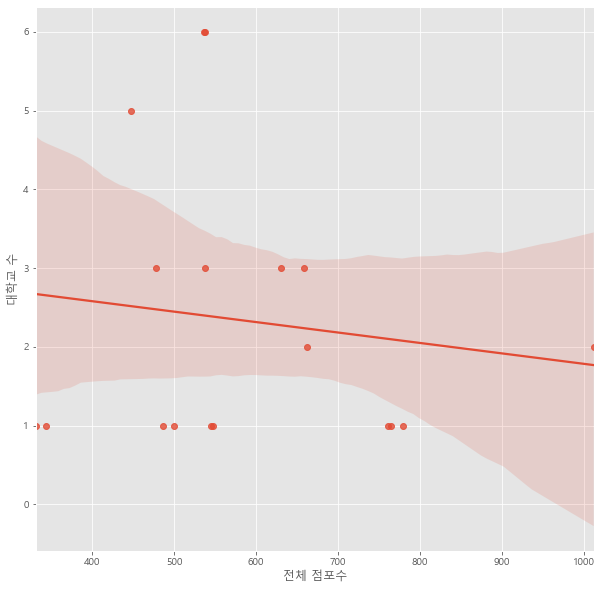

In [87]:
plt.rc("font", family="Malgun Gothic")
plt.figure(figsize=(10, 10))
ax = sns.regplot(x='전체 점포수',y='대학교 수',data=df)

### 3)직장인구 csv파일 로드 및 사전작업

In [88]:
df_com = pd.read_csv('서울시 직장인구.csv', index_col=0, encoding='CP949', engine='python')
df_com.head()

,직장인구,면적
행정구역,,
종로구,99,2400
중구,336,1000
용산구,83,2200
성동구,49,1700
광진구,46,1700


In [89]:
df_com['총 직장인구']=df_com['직장인구']*df_com['면적']/1000

In [90]:
df_com.head()

,직장인구,면적,총 직장인구
행정구역,,,
종로구,99,2400,237.6
중구,336,1000,336.0
용산구,83,2200,182.6
성동구,49,1700,83.3
광진구,46,1700,78.2


In [91]:
df_com = df_com.reset_index()
df_com.head()

,행정구역,직장인구,면적,총 직장인구
0,종로구,99,2400,237.6
1,중구,336,1000,336.0
2,용산구,83,2200,182.6
3,성동구,49,1700,83.3
4,광진구,46,1700,78.2


In [92]:
df_com.columns = ['행정구','직장인구','면적','총 직장인구']
df_com.head()

,행정구,직장인구,면적,총 직장인구
0,종로구,99,2400,237.6
1,중구,336,1000,336.0
2,용산구,83,2200,182.6
3,성동구,49,1700,83.3
4,광진구,46,1700,78.2


In [93]:
df2 = pd.merge(df_com, df_pub, on = "행정구")
df2

,행정구,직장인구,면적,총 직장인구,전체 점포수,프랜차이즈점포수,일반점포수
0,종로구,99,2400,237.6,630,69,561
1,중구,336,1000,336.0,500,45,455
2,용산구,83,2200,182.6,486,45,441
3,성동구,49,1700,83.3,331,47,284
4,광진구,46,1700,78.2,659,74,585
5,동대문구,55,1400,77.0,538,52,486
6,중랑구,22,1800,39.6,603,69,534
7,성북구,45,2500,112.5,538,72,466
8,강북구,12,3500,42.0,606,61,545
9,도봉구,17,2100,35.7,344,32,312


### 4)직장인구와 점포수 사이의 관계 시각화

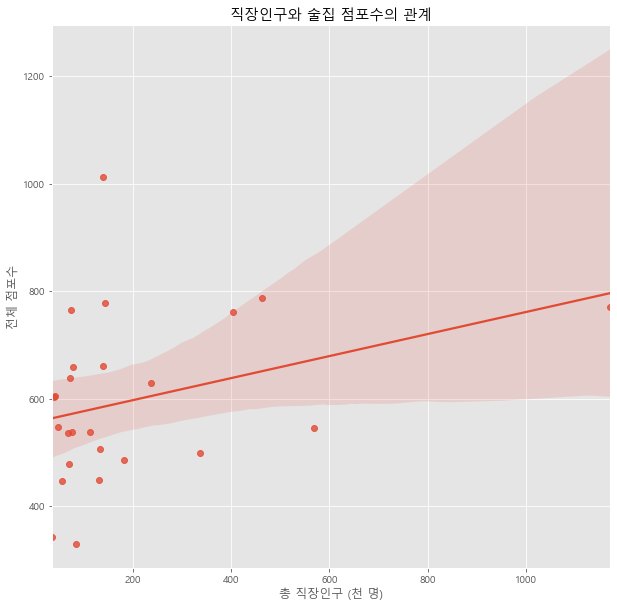

In [94]:
#plt.rc("font", family="Malgun Gothic")
plt.figure(figsize=(10, 10))
ax = sns.regplot(x='총 직장인구',y='전체 점포수',data=df2)
ax.set_xlabel('총 직장인구 (천 명)')  # x축 이름 설정
#ax.set_ylabel('Tip') # y축 이름 설정
ax.set_title('직장인구와 술집 점포수의 관계') # 그래프 제목 설정
plt.savefig('직장인구와 술집 점포수의 관계.png')

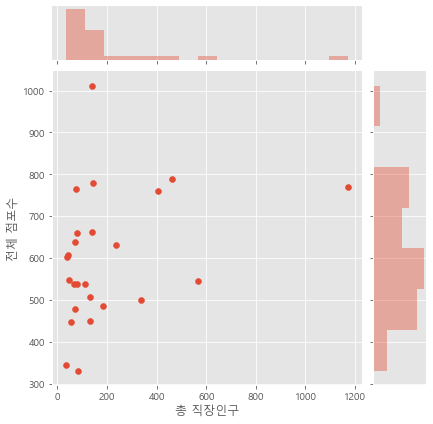

In [95]:
joint = sns.jointplot(x='총 직장인구',y='전체 점포수',data=df2)

# 7.기타

### 1)임대시세 순위 나누기(프로그램 사용하기 위해서)

In [96]:
df_total = pd.read_csv('정리.csv', index_col=0, encoding='CP949', engine='python')
df_total.head()

,카테고리,임대시세,점포수,인구수,리뷰,역세권,직장인구
구,,,,,,,
종로구,음식점,169274,3685,153600,382512,0.0,0
중구,음식점,245055,3620,125000,111089,0.0,0
용산구,음식점,117720,2564,233200,53525,0.0,0
성동구,음식점,103535,2204,309400,56898,0.0,0
광진구,음식점,99247,2596,336600,14816,0.0,0


In [97]:
df_total = df_total.sort_values(by=['임대시세'],axis=0, ascending=False)
df_total = df_total.reset_index()
df_total

,구,카테고리,임대시세,점포수,인구수,리뷰,역세권,직장인구
0,중구,술집,245055,500,125000,0,0.0,336000
1,중구,카페,245055,1189,125000,0,NaN,0
2,중구,음식점,245055,3620,125000,111089,0.0,0
3,종로구,음식점,169274,3685,153600,382512,0.0,0
4,종로구,카페,169274,1283,153600,0,NaN,0
...,...,...,...,...,...,...,...,...
70,중랑구,음식점,81028,2377,390600,46994,0.0,0
71,중랑구,술집,81028,603,390600,0,0.0,39600
72,도봉구,음식점,79696,1602,336000,38054,0.0,0
73,도봉구,카페,79696,341,336000,0,NaN,0


In [98]:
df_total = df_total.loc[:,['구','임대시세']]
df_total = df_total.drop_duplicates("구", keep="first")
df_total

,구,임대시세
0,중구,245055
3,종로구,169274
6,강남구,136661
9,송파구,124972
12,마포구,123118
15,서초구,119955
18,용산구,117720
21,동작구,115375
24,구로구,108939
27,영등포구,107455


In [99]:
list_total = df_total['구'].values.tolist()
list_total

['중구',
 '종로구',
 '강남구',
 '송파구',
 '마포구',
 '서초구',
 '용산구',
 '동작구',
 '구로구',
 '영등포구',
 '강동구',
 '서대문구',
 '관악구',
 '금천구',
 '성동구',
 '노원구',
 '강서구',
 '광진구',
 '양천구',
 '은평구',
 '동대문구',
 '성북구',
 '강북구',
 '중랑구',
 '도봉구']

In [100]:
top = []    #상위 8개 리스트
middle = [] #보통 8개
bottom = [] #하위 9개
 
for i in range(25):
    if i < 8: top.append(list_total[i])    # append로 요소 추가
    elif i < 16: middle.append(list_total[i])
    else: bottom.append(list_total[i])
 
print(top)
print(middle)
print(bottom)

['중구', '종로구', '강남구', '송파구', '마포구', '서초구', '용산구', '동작구']
['구로구', '영등포구', '강동구', '서대문구', '관악구', '금천구', '성동구', '노원구']
['강서구', '광진구', '양천구', '은평구', '동대문구', '성북구', '강북구', '중랑구', '도봉구']


### 2)필요 없는 열 없애는 작업

In [101]:
data = pd.read_csv('정리.csv', index_col=0, encoding='CP949', engine='python')


data.head()

,카테고리,임대시세,점포수,인구수,리뷰,역세권,직장인구
구,,,,,,,
종로구,음식점,169274,3685,153600,382512,0.0,0
중구,음식점,245055,3620,125000,111089,0.0,0
용산구,음식점,117720,2564,233200,53525,0.0,0
성동구,음식점,103535,2204,309400,56898,0.0,0
광진구,음식점,99247,2596,336600,14816,0.0,0


In [102]:
# 필요없는 열없애기

data = data.drop('임대시세', axis=1)
data = data.drop('인구수', axis=1)
data = data.drop('리뷰',axis=1)
data = data.drop('역세권',axis=1)
data= data.drop('직장인구',axis=1)


data.head() #작업내용 확인용 출력

,카테고리,점포수
구,,
종로구,음식점,3685
중구,음식점,3620
용산구,음식점,2564
성동구,음식점,2204
광진구,음식점,2596


In [ ]:
#FINISH